In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pickle
from pathlib import Path

In [23]:
MODELS_DIR = Path("models/iris-model")
SKLEARN_MODEL_PATH = MODELS_DIR.joinpath("sklearn/model.pk")
TF_MODEL_PATH = MODELS_DIR.joinpath("tf/model.keras")

SKLEARN_MODEL_PATH.parent.mkdir(exist_ok=True, parents=True)
TF_MODEL_PATH.parent.mkdir(exist_ok=True, parents=True)

# Train model using sklearn

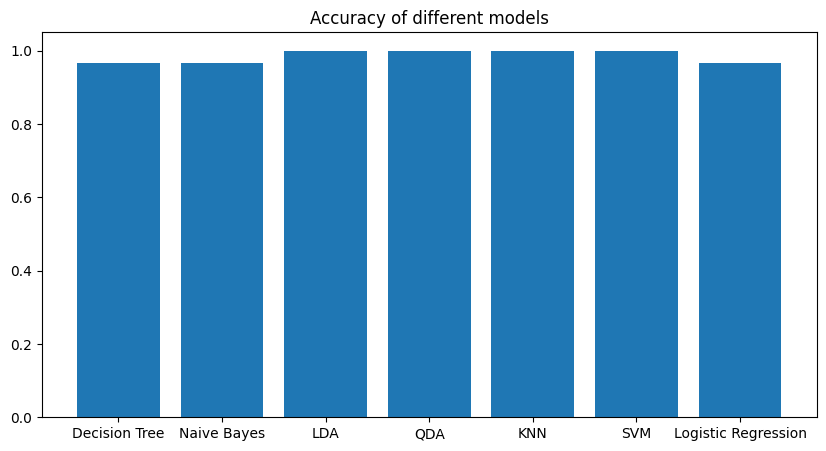

The best model is LDA with an accuracy of 1.00


In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

X, y = df.drop("target", axis=1), df["target"]

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create a list of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=1),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel="linear"),
    "Logistic Regression": LogisticRegression(),
}

# # Train the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = metrics.accuracy_score(y_test, y_pred)

# Plot results
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title("Accuracy of different models")
plt.show()


# Print results
best_model = max(results, key=results.get)
print(f"The best model is {best_model} with an accuracy of {results[best_model]:.2f}")

# save the model to disk
pickle.dump(
    models[best_model], open(SKLEARN_MODEL_PATH, "wb")
)  # export the model to a file so we can use it later


# Train model using Tensorflow

In [4]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from pathlib import Path
import numpy as np

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
train_dataset, metadata = tfds.load("iris", with_info=True, as_supervised=True, split="train", batch_size=32)
num_examples = metadata.splits["train"].num_examples
num_classes = metadata.features["label"].num_classes
labels = metadata.features["label"].names

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/150 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/iris/incomplete.VTMLLI_2.1.0/iris-train.tfrecord*...:   0%|          | 0/1…

Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.1.0. Subsequent calls will reuse this data.


In [7]:
num_examples

150

In [8]:
labels

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [9]:
num_classes

3

(32, 4)


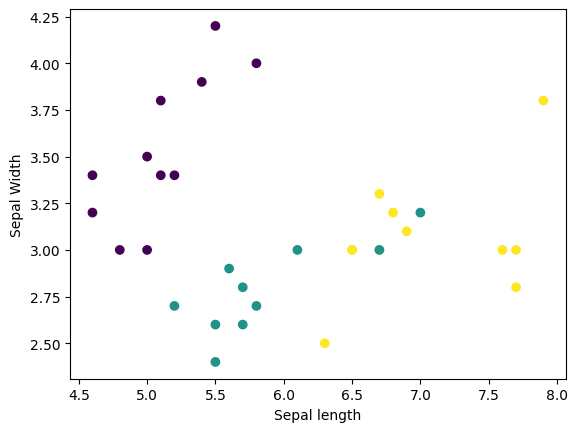

In [10]:
features, labels = next(iter(train_dataset))
sepal_length = features[:,0]
sepal_width = features[:,1]
print(features.shape)

plt.scatter(sepal_length,
            sepal_width,
            c=labels,
            cmap='viridis')
plt.xlabel("Sepal length")
plt.ylabel("Sepal Width")
plt.show()

In [16]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(4,)),
  tf.keras.layers.Dense(10, activation=tf.nn.relu, name= "input"),
  tf.keras.layers.Dense(5, activation=tf.nn.relu),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax, name="output")
])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 5)                   │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 3)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143 (572.00 B)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 10 (40.00 B)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5414 - loss: 1.1723
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5546 - loss: 1.1440
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5712 - loss: 1.1199
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5842 - loss: 1.1012
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5842 - loss: 1.0850 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5842 - loss: 1.0700
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5807 - loss: 1.0557 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5807 - loss: 1.0422
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5807 - loss: 1.0293 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5807 - loss: 1.0170
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5755 - loss: 1.0051 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5755 - loss: 0.9935 
Epoch 13

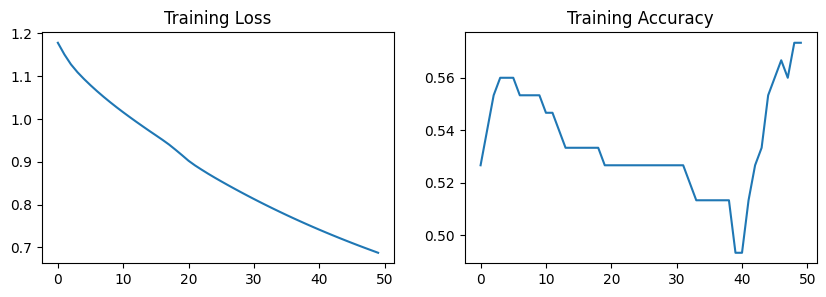

In [17]:
loss_fun = tf.keras.losses.SparseCategoricalCrossentropy()
opt_fun = tf.keras.optimizers.Adam()
model.compile(optimizer=opt_fun, loss=loss_fun, metrics=['accuracy'] )
history = model.fit(train_dataset, batch_size=12, epochs=50)

acc = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(10, 3))
ax = plt.subplot(1, 2, 1)
ax.set_title("Training Loss")
ax.plot(loss)
ax = plt.subplot(1, 2, 2)
ax.set_title("Training Accuracy")
ax.plot(acc)
plt.show()

In [20]:
predictions = model.predict(np.array([[0.5, 0.4, 0.8, 0.4]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


In [21]:
predictions

array([[0.8475437 , 0.04531982, 0.10713644]], dtype=float32)

In [24]:
model.save(TF_MODEL_PATH)